# This notebook will produce the graphs from Section 4.2.2

In [ ]:
import data
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
# Copying the master data set 'data' using the 'room.occ' file to use only the room occupancy information
Occ_clust = data.room_occ.copy()
Occ_clust.head()

In [ ]:
#Adding the hour, day c
Occ_clust['Hour'] = Occ_clust.index.hour
Occ_clust['Day'] = Occ_clust.index.dayofyear
Occ_clust_headers = Occ_clust.columns

Occ_lists = []
for i in range(len(Occ_clust_headers)-2):
    temp = Occ_clust[[i,-1,-2]].resample('1H').mean().pivot(columns = 'Hour', index = 'Day')
    temp = temp.fillna(0)
    temp = temp.replace(np.inf,0)
    Occ_lists.append(temp)


In [123]:
Occ_inertia = np.zeros((len(Occ_lists),20))
Occ_cluster = []

for j in range(len(Occ_lists)):
    for i in range(1,20):
        Occ_inertia[j][i] = KMeans(n_clusters = i).fit(Occ_lists[j]).inertia_
        
for i in range(len(Occ_lists)):
    Occ_cluster.append(KMeans(n_clusters = 2).fit(Occ_lists[i]))


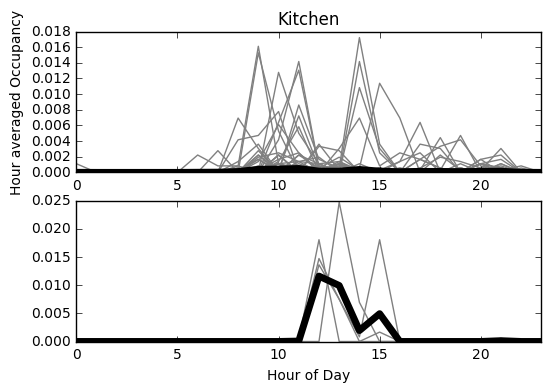

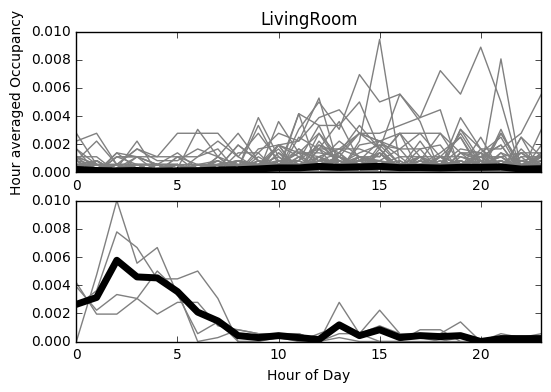

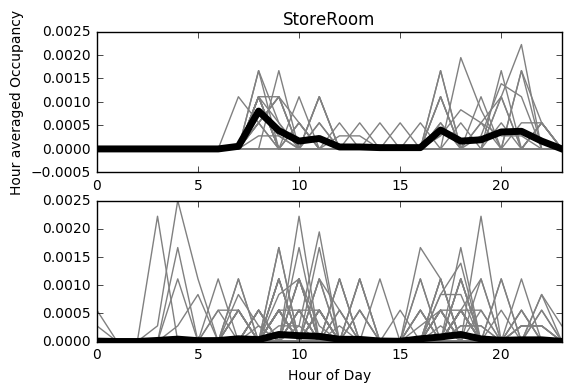

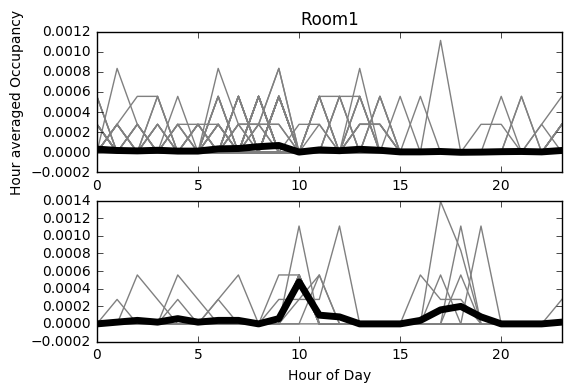

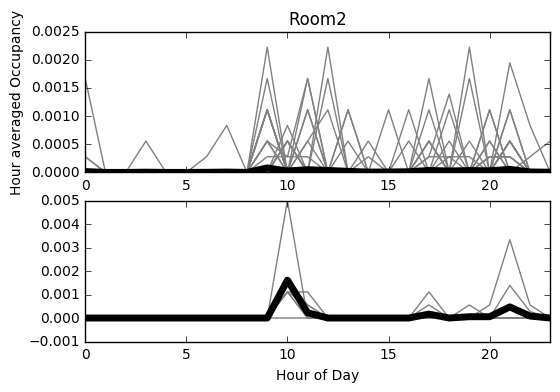

In [239]:
for i in range(len(Occ_cluster)):
    plt.figure(i)
    plt.figure(figsize=(6,4))

    plt.subplot(2,1,1)
    for j in range(0,154):
        if Occ_cluster[i].labels_[j] == 0:
            plt.plot(Occ_lists[i][Occ_lists[i].index == j+186].values[0],'gray')
    plt.plot(Occ_cluster[i].cluster_centers_[0], 'k', linewidth = 5)        
    
    plt.title(Occ_clust_headers[i])
    
    plt.ylabel('Hour averaged Occupancy')
    plt.xlim(0,23)
    
    plt.subplot(2,1,2)
    for j in range(0,154):
        if Occ_cluster[i].labels_[j] == 1:
            plt.plot(Occ_lists[i][Occ_lists[i].index == j+186].values[0],'gray')
    plt.plot(Occ_cluster[i].cluster_centers_[1], 'k', linewidth = 5) 
    
    plt.xlabel('Hour of Day')
    
    plt.xlim(0,23)

    plt.show()
        
    

In [201]:
Occ_cluster[1].labels_[2]

0